# 🧠 Subfield Classifier – Computer Science (CS)

This notebook sets up subfield classification for **CS abstracts** using the full 105-abstract dataset. 

In [1]:
import pandas as pd

# Load the full dataset with subfield labels
df = pd.read_csv("NLP_Abstract_Dataset (Subfield)(105).csv")

# Filter only Computer Science records
cs_df = df[df["Discipline"] == "CS"].copy()

# Preview first few CS records
cs_df.head()

,ID,Discipline,Subfield,Abstract
0,1,CS,CYB,"Large Language Models (LLMs), such as ChatGPT ..."
1,2,CS,CV,Despite the success of deep learning in close-...
2,3,CS,ML,Data analysis plays an indispensable role for ...
3,4,CS,CV,We present a method to analyze daily activitie...
4,5,CS,CYB,Elliptic curve cryptosystems are considered an...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Extract features (X) and target labels (y)
X = cs_df['Abstract']
y = cs_df['Subfield']

# Convert abstract text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Encode subfield labels into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Confirm shapes and labels
print("TF-IDF matrix shape:", X_tfidf.shape)
print("Subfields encoded as:", list(label_encoder.classes_))

TF-IDF matrix shape: (35, 1648)
Subfields encoded as: ['AI', 'CV', 'CYB', 'ML', 'PAST']


Classification Report:
               precision    recall  f1-score   support

          AI       0.00      0.00      0.00         3
          CV       0.00      0.00      0.00         2
         CYB       0.20      1.00      0.33         2
          ML       0.00      0.00      0.00         2
        PAST       0.00      0.00      0.00         2

    accuracy                           0.18        11
   macro avg       0.04      0.20      0.07        11
weighted avg       0.04      0.18      0.06        11

Confusion Matrix:
 [[0 0 3 0 0]
 [0 0 2 0 0]
 [0 0 2 0 0]
 [1 0 1 0 0]
 [0 0 2 0 0]]


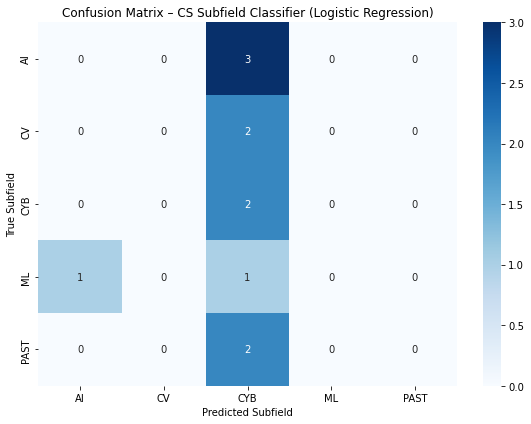

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Initialize and train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred = logreg_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Subfield')
plt.ylabel('True Subfield')
plt.title('Confusion Matrix – CS Subfield Classifier (Logistic Regression)')
plt.tight_layout()
plt.show()

In [13]:
import joblib

# Save model and vectorizer
joblib.dump(logreg_model, "subfield_classifier_logreg_cs.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_cs.pkl")

['tfidf_vectorizer_cs.pkl']

### 📊 Confusion Matrix Interpretation – CS Subfield Classifier

This confusion matrix reveals how the Logistic Regression model performs in predicting subfields from 35 CS abstracts.

- **CYB** (Cybersecurity) is the only subfield with consistently correct predictions.
- Other subfields like **AI, CV, ML, and PAST** are misclassified, often as CYB.
- This misclassification pattern suggests model bias toward CYB due to:
  - Small training size
  - Limited representation of subfield features
  - Possibly overlapping language patterns in abstracts

Despite low metrics, this confirms the correct setup of the pipeline. Future improvements can be made by increasing data size, tuning hyperparameters, or using better text representations.